In [6]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG19
from tensorflow import image,io
import cv2
import matplotlib.pyplot as plt

### Check For the Image

Ukuran Gambar :  (48, 48, 3)


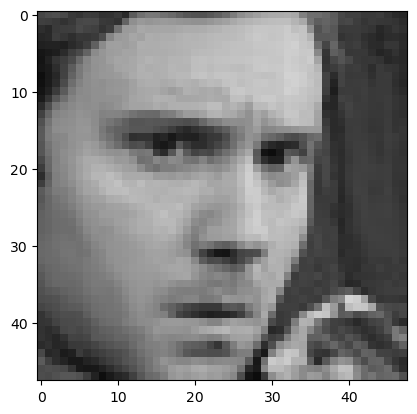

In [7]:
EXAMPLE_IMAGE_PATH = './images/train/angry/0.jpg'
tf_img = io.read_file(EXAMPLE_IMAGE_PATH)
tf_img = image.decode_png(tf_img, channels=3)
print("Ukuran Gambar : ",tf_img.shape)
plt.imshow(tf_img)
plt.show()

### Preprocessing Image

In [8]:
TRAIN_FILE_PATH = './images/train/'
VALIDATION_FILE_PATH = './images/validation/'
TARGET_SIZE = 48

train_gen = ImageDataGenerator(                                                 
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    horizontal_flip = True,
    rescale = 1./255,
    validation_split = 0.2
)

valid_gen = ImageDataGenerator(
    rescale = 1./255,
    validation_split = 0.2
)

train_dataset = train_gen.flow_from_directory(
    TRAIN_FILE_PATH,
    target_size=(TARGET_SIZE,TARGET_SIZE),
    batch_size=64,
    color_mode = 'grayscale',
    class_mode = 'categorical',
    subset = 'training'
)

valid_dataset = valid_gen.flow_from_directory(
    VALIDATION_FILE_PATH,
    target_size=(TARGET_SIZE,TARGET_SIZE),
    batch_size=64,
    color_mode = 'grayscale',
    class_mode = 'categorical',
    subset = 'validation'
)

Found 23060 images belonging to 7 classes.
Found 1411 images belonging to 7 classes.


In [4]:
# VGG19_model = VGG19(include_top=False,input_shape=(TARGET_SIZE,TARGET_SIZE,3),weights='imagenet')
# VGG19_model.trainable = False
# name = 'VGG19'
# VGG19_model.summary()

In [5]:
# model = tf.keras.models.Sequential([
#     VGG19_model,
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(128,activation='relu'),
#     tf.keras.layers.Dropout(.2),
#     tf.keras.layers.Dense(7,activation='softmax'),
# ],name=name)

In [6]:
# model.summary()

In [7]:
# model.compile(
#     loss = 'categorical_crossentropy',
#     optimizer = 'adam',
#     metrics = ['accuracy']
# )

# model.fit(
#     train_dataset,
#     epochs = 10,
#     validation_data = valid_dataset,
# )

In [8]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten,Dense,Dropout,BatchNormalization
import cv2
from keras import regularizers
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adamax

In [9]:
model= tf.keras.models.Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(48, 48,1)))
model.add(Conv2D(64,(3,3), padding='same', activation='relu' ))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(5,5), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
    
model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten()) 
model.add(Dense(256,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
    
model.add(Dense(512,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(7, activation='softmax'))

model.compile(
    optimizer = Adam(lr=0.0001), 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
  )

c:\Users\alrav\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [10]:
history = model.fit(x = train_dataset,epochs = 60,validation_data = valid_dataset,batch_size=64)

Epoch 1/60
361/361 [==============================] - 436s 1s/step - loss: 9.3078 - accuracy: 0.1928 - val_loss: 9.0681 - val_accuracy: 0.1722
Epoch 2/60
361/361 [==============================] - 446s 1s/step - loss: 8.2618 - accuracy: 0.2288 - val_loss: 7.5664 - val_accuracy: 0.2580
Epoch 3/60
361/361 [==============================] - 442s 1s/step - loss: 7.2510 - accuracy: 0.2534 - val_loss: 6.5440 - val_accuracy: 0.2984
Epoch 4/60
361/361 [==============================] - 484s 1s/step - loss: 6.2697 - accuracy: 0.2745 - val_loss: 5.6315 - val_accuracy: 0.3515
Epoch 5/60
361/361 [==============================] - 518s 1s/step - loss: 5.3709 - accuracy: 0.3100 - val_loss: 4.7873 - val_accuracy: 0.3728
Epoch 6/60
361/361 [==============================] - 462s 1s/step - loss: 4.5993 - accuracy: 0.3378 - val_loss: 4.0669 - val_accuracy: 0.4033
Epoch 7/60
361/361 [==============================] - 486s 1s/step - loss: 3.9529 - accuracy: 0.3655 - val_loss: 3.5139 - val_accuracy: 0.4266

In [13]:
export_dir = 'saved_model/'
tf.keras.models.save_model(model,export_dir)

INFO:tensorflow:Assets written to: saved_model/assets


In [ ]:
model.save('my_model.h5')

In [14]:
import pathlib

# Convert SavedModel menjadi vegs.tflite
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()

tflite_model_file = pathlib.Path('vegs.tflite')
tflite_model_file.write_bytes(tflite_model)

17973536

In [15]:
export_dir = 'saved_model/'
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
converter.optimizations = [tf.lite.Optimize.DEFAULT] #ngecilin ukuran model
# converter.representative_dataset = representative_dataset
tflite_model = converter.convert()

tflite_model_file = pathlib.Path('model2.tflite')
tflite_model_file.write_bytes(tflite_model)

4538656

In [9]:
model = tf.keras.models.load_model('my_model.h5')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 64)        18496     
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 128)       2

In [10]:
model.evaluate(train_dataset)

361/361 [==============================] - 184s 510ms/step - loss: 1.1781 - accuracy: 0.7281


[1.1781389713287354, 0.7280572652816772]